## Qualitative_Bankruptcy Project 

### Please follow the below steps to complete the project 
1. Read the dataset and understand the features and target variable.
2. Encode independent features.
3. Separate the dependant variable from the rest of the train data
4. Split the dataset into training and test data ( Take 80:20 ratio). 
5. Apply PCA on the independent features of train data.
6. Display elbow plot to find out reduced number of dimensions (which covers more than
95% of the variance).
7. Transform the data using PCA ( select optimum number of PCs).
8. Apply KMeans algorithm on the above transformed data.
9. Select optimal number of clusters and form clusters out of the train data. 
10. Create a new column in the train data and populate it with the cluster labels. 
11. Transform the test data using the same PCA object that was fit on the train data.
12. Use the same kmeans object, assign cluster labels to the test data and store it as a
feature.
13. Apply any classification model (example: Logistic Regression) on train dataset and
predict target for test dataset. 
14. Check accuracy and confusion matrix.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the dataset to understand the features and variable to decide the target variable and the furthe operatins 

In [4]:
df = pd.read_csv('Qualitative_Bankruptcy.data.txt', sep=",", header=None)

In [5]:
print(df)

     0  1  2  3  4  5   6
0    P  P  A  A  A  P  NB
1    N  N  A  A  A  N  NB
2    A  A  A  A  A  A  NB
3    P  P  P  P  P  P  NB
4    N  N  P  P  P  N  NB
5    A  A  P  P  P  A  NB
6    P  P  A  P  P  P  NB
7    P  P  P  A  A  P  NB
8    P  P  A  P  A  P  NB
9    P  P  A  A  P  P  NB
10   P  P  P  P  A  P  NB
11   P  P  P  A  P  P  NB
12   N  N  A  P  P  N  NB
13   N  N  P  A  A  N  NB
14   N  N  A  P  A  N  NB
15   N  N  A  P  A  N  NB
16   N  N  A  A  P  N  NB
17   N  N  P  P  A  N  NB
18   N  N  P  A  P  N  NB
19   A  A  A  P  P  A  NB
20   A  A  P  A  A  A  NB
21   A  A  A  P  A  A  NB
22   A  A  A  A  P  A  NB
23   A  A  P  P  A  A  NB
24   A  A  P  A  P  A  NB
25   P  N  A  A  A  P  NB
26   N  P  A  A  A  N  NB
27   P  N  A  A  A  N  NB
28   P  N  P  P  P  P  NB
29   N  P  P  P  P  N  NB
..  .. .. .. .. .. ..  ..
220  A  A  N  N  N  P   B
221  A  N  N  N  N  N   B
222  P  A  N  N  N  A   B
223  P  N  N  N  N  P   B
224  P  A  N  N  N  N   B
225  P  N  N  N  N  N   B
226  N  A  N

Here caloumn names are not defined so we need to define using python 

In [6]:
colnames = ['Industrial_Risk', 'Management_Risk', 'Financial_Flexibility', 'Credibility', 'Competitiveness', 'Operating_Risk', 'Class']

df = pd.read_csv("Qualitative_Bankruptcy.data.txt", names=colnames)
df

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating_Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB
5,A,A,P,P,P,A,NB
6,P,P,A,P,P,P,NB
7,P,P,P,A,A,P,NB
8,P,P,A,P,A,P,NB
9,P,P,A,A,P,P,NB


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
Industrial_Risk          250 non-null object
Management_Risk          250 non-null object
Financial_Flexibility    250 non-null object
Credibility              250 non-null object
Competitiveness          250 non-null object
Operating_Risk           250 non-null object
Class                    250 non-null object
dtypes: object(7)
memory usage: 13.8+ KB


In [8]:
df.head()

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating_Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [9]:
print(df.dtypes)
print(df.isnull().sum())

Industrial_Risk          object
Management_Risk          object
Financial_Flexibility    object
Credibility              object
Competitiveness          object
Operating_Risk           object
Class                    object
dtype: object
Industrial_Risk          0
Management_Risk          0
Financial_Flexibility    0
Credibility              0
Competitiveness          0
Operating_Risk           0
Class                    0
dtype: int64


In [10]:
df.describe().transpose()

,count,unique,top,freq
Industrial_Risk,250,3,N,89
Management_Risk,250,3,N,119
Financial_Flexibility,250,3,N,119
Credibility,250,3,N,94
Competitiveness,250,3,N,103
Operating_Risk,250,3,N,114
Class,250,2,NB,143


#### 2. one hot encoding we will do to the independent feature 

In [11]:
df["Class"].value_counts()

NB    143
B     107
Name: Class, dtype: int64

In [31]:
df_en =df.iloc[:,0:6]
df_en =pd.get_dummies(df_x_encoded)

df_en.head()


,Industrial_Risk_A,Industrial_Risk_N,Industrial_Risk_P,Management_Risk_A,Management_Risk_N,Management_Risk_P,Financial_Flexibility_A,Financial_Flexibility_N,Financial_Flexibility_P,Credibility_A,Credibility_N,Credibility_P,Competitiveness_A,Competitiveness_N,Competitiveness_P,Operating_Risk_A,Operating_Risk_N,Operating_Risk_P
0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1
1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
2,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0


## Converting brankruptcy to '1' and non-bankruptcy to '0' 
### 3.Superate independent variable to train the data

In [33]:
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
y = df['Class']
y_en = le.fit_transform(y)

In [34]:
X=df_en.values
y=y_en

In [35]:
type(X)


numpy.ndarray

In [36]:
type(y)

numpy.ndarray

### Split train and test data (80:20)

In [37]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(y_train,y_test)

[1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1
 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1
 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1
 0 1 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0
 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1
 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1] [1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1
 0 0 0 1 1 1 0 0 1 0 1 0 1]


In [38]:
y_train.shape,y_test.shape

((200,), (50,))

In [39]:
X_train.shape,X_test.shape

((200, 18), (50, 18))

### Applying PCA for Independent Featears

In [41]:
from sklearn.decomposition import PCA
pca = PCA()
PC = pca.fit(X_train)
PC.explained_variance_ratio_

array([2.66112991e-01, 1.24298489e-01, 9.28840777e-02, 9.21414357e-02,
       8.36436065e-02, 7.70529029e-02, 6.88195573e-02, 5.83996566e-02,
       5.22283593e-02, 4.49984695e-02, 2.61251468e-02, 1.32953076e-02,
       1.03315157e-32, 4.31399602e-33, 3.42794832e-33, 2.83735811e-33,
       2.07760197e-33, 1.29985493e-33])

###  Cumulative summation to determaining the number of principle component using Varience 

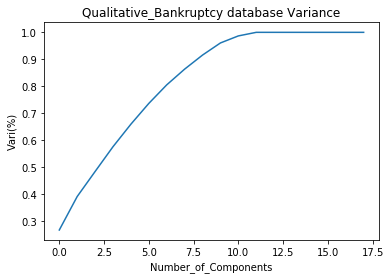

In [42]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(PC.explained_variance_ratio_))
plt.xlabel('Number_of_Components')
plt.ylabel('Vari(%)') #for each component
plt.title('Qualitative_Bankruptcy database Variance')
plt.show()

### Here we can get 11 as a principal components since after 11 varience is not changig

### Transform the data using PCA.

In [43]:
#The optimal principal components is 11 from the graph above
pca = PCA(n_components=11)
pca.fit(X_train)
pca_X_train = pca.transform(X_train)
pca_X_test = pca.transform(X_test)
principalDf_train = pd.DataFrame(data = pca_X_train)
principalDf_test = pd.DataFrame(data = pca_X_test)
pca.components_

array([[-0.12136012,  0.18529991, -0.06393979, -0.09249814,  0.25145933,
        -0.15896119, -0.22770953,  0.40096734, -0.17325781, -0.15410144,
         0.39239109, -0.23828965, -0.15704241,  0.44237847, -0.28533607,
        -0.03181833,  0.20212143, -0.1703031 ],
       [ 0.46848434, -0.38029207, -0.08819227,  0.39144779, -0.34627316,
        -0.04517463, -0.1005853 ,  0.25242548, -0.15184018, -0.22365843,
         0.19443731,  0.02922112, -0.06151458,  0.11051526, -0.04900069,
         0.1958863 , -0.31173635,  0.11585006],
       [-0.1724765 , -0.28550577,  0.45798226, -0.07417186, -0.17490683,
         0.24907869,  0.10392519,  0.02530344, -0.12922863,  0.1495659 ,
         0.15110818, -0.30067409,  0.20349085,  0.07544386, -0.27893471,
        -0.37027389, -0.02288733,  0.39316122],
       [-0.17540339, -0.1949092 ,  0.37031259,  0.24798552, -0.26565065,
         0.01766513, -0.2258033 , -0.04206296,  0.26786627, -0.08329241,
         0.11733234, -0.03403993, -0.3984733 ,  0.011

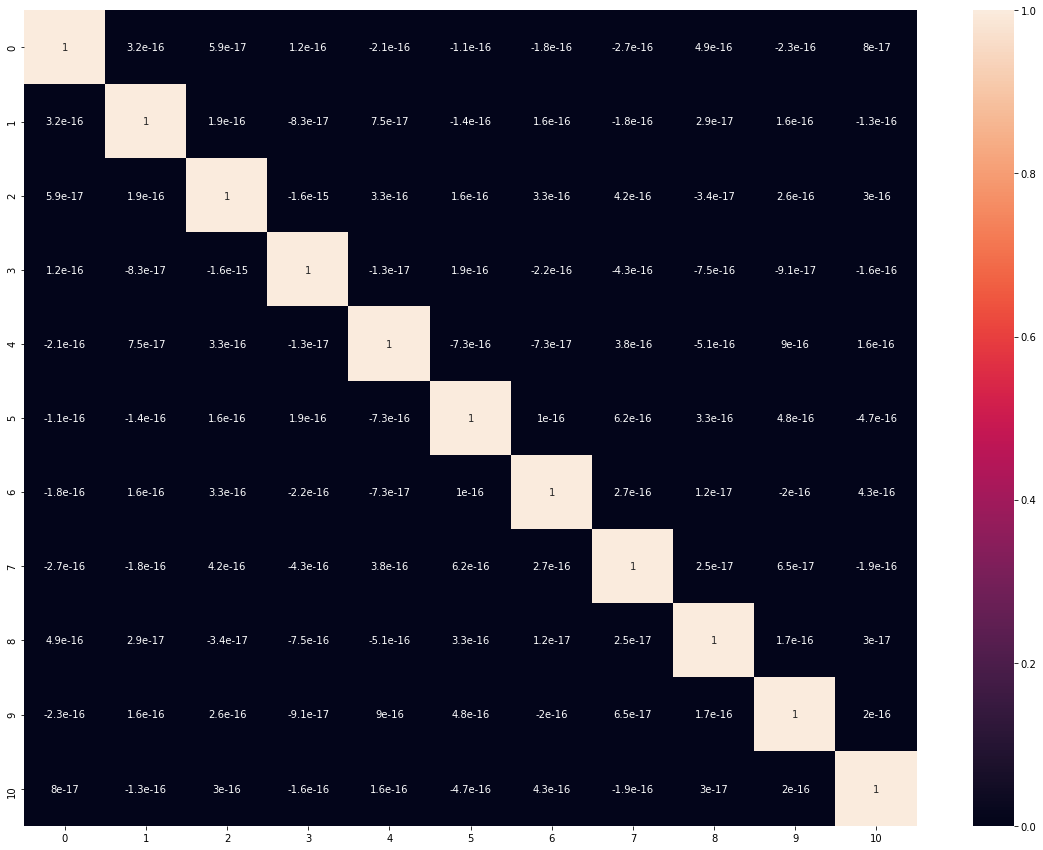

In [44]:
import seaborn as sns
plt.subplots(figsize=(20,15))
sns.heatmap(principalDf_train.corr(),annot=True)

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X_train)  # scale data 

X_std

array([[ 1.36277029, -0.73379939, -0.65465367, ...,  1.85592145,
        -0.90453403, -0.69388867],
       [-0.73379939, -0.73379939,  1.52752523, ..., -0.53881591,
         1.1055416 , -0.69388867],
       [ 1.36277029, -0.73379939, -0.65465367, ..., -0.53881591,
         1.1055416 , -0.69388867],
       ...,
       [ 1.36277029, -0.73379939, -0.65465367, ...,  1.85592145,
        -0.90453403, -0.69388867],
       [-0.73379939,  1.36277029, -0.65465367, ..., -0.53881591,
        -0.90453403,  1.44115338],
       [-0.73379939, -0.73379939,  1.52752523, ..., -0.53881591,
         1.1055416 , -0.69388867]])

In [63]:
cov_matrix = np.cov(X_std.T)

print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00502513e+00 -5.41167375e-01 -4.82798454e-01  2.81233997e-01
  -3.07883765e-01  6.33624198e-02  7.73918919e-02 -1.26527575e-02
  -6.93819987e-02 -8.00906734e-03 -1.21550460e-01  1.34949918e-01
   1.03607954e-01 -1.43520220e-01  5.52211607e-02  2.08145996e-01
  -2.22360643e-01  5.06110298e-02]
 [-5.41167375e-01  1.00502513e+00 -4.82798454e-01 -2.78900105e-01
   3.66929966e-01 -1.35421642e-01 -1.07424566e-01  1.34962746e-01
  -4.41521810e-02 -8.00906734e-03  7.37984936e-02 -6.91760086e-02
  -1.43077650e-01  3.06319276e-01 -1.87751947e-01 -6.93819987e-02
   2.22360643e-01 -1.74326880e-01]
 [-4.82798454e-01 -4.82798454e-01  1.00502513e+00 -2.42919191e-03
  -6.14572350e-02  7.50016168e-02  3.12589987e-02 -1.27304272e-01
   1.18170121e-01  1.66722032e-02  4.97018225e-02 -6.84596558e-02
   4.10813628e-02 -1.69446629e-01  1.37942415e-01 -1.44430148e-01
  -2.45476448e-17  1.28767540e-01]
 [ 2.81233997e-01 -2.78900105e-01 -2.42919191e-03  1.00502513e+00
  -6.09628519e-

In [64]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)


# Make a set of (eigenvalue, eigenvector) pairs
print('eigen value eigern vector pairs')

eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)



print('Totalnumber of eigenvalues')
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 

print("Variance is :", var_explained)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance.

print("\n\nCumulative Variance Explained", cum_var_exp)

Eigen Vectors 
%s [[-0.11863564  0.46930615  0.03085605 -0.09019081  0.07373068 -0.18984072
   0.47042788  0.13962757  0.15027341  0.06580552 -0.26166486 -0.19191313
  -0.02012105 -0.05567588 -0.55800238  0.10022625 -0.0062693   0.02661453]
 [ 0.18498645 -0.33878176 -0.14831879 -0.05959045 -0.18395987 -0.3093396
  -0.37361367 -0.26068719 -0.28760127 -0.1511276  -0.08989659 -0.18066414
  -0.02012105 -0.05567588 -0.55800238  0.10022625 -0.0062693   0.02661453]
 [-0.06906011 -0.13585409  0.12225909  0.15589729  0.11473018  0.51956336
  -0.10076742  0.12600285  0.14293537  0.08880603  0.36591676  0.38779072
  -0.01933168 -0.05349166 -0.53611135  0.09629426 -0.00602334  0.02557041]
 [-0.09040553  0.43556226 -0.04498379  0.14888677 -0.12426904  0.15978484
  -0.16853598 -0.46539048 -0.2378387   0.28972512 -0.10204467  0.13853055
  -0.03434246 -0.05788425  0.08790178  0.42863652  0.35029399 -0.12260382]
 [ 0.24032783 -0.28592245  0.01471674 -0.01666997 -0.11706078 -0.29681042
   0.45538656  0.

### ploting of cumulitive varience and induvidual varience 

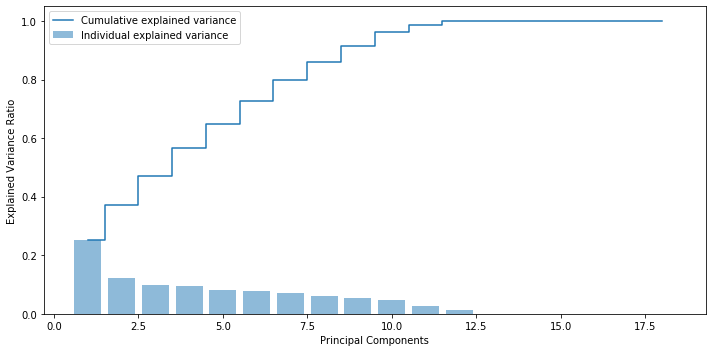

In [65]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eigenvalues.size + 1), var_explained, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigenvalues.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

### From here we are taking the PCA components as 11 from plot 

In [66]:
pca = PCA(n_components=11)
pca.fit(X_train)
pca_X_train = pca.transform(X_train)
pca_X_test = pca.transform(X_test)
principalDf_train = pd.DataFrame(data = pca_X_train)
principalDf_test = pd.DataFrame(data = pca_X_test)
pca.components_


array([[-0.12136012,  0.18529991, -0.06393979, -0.09249814,  0.25145933,
        -0.15896119, -0.22770953,  0.40096734, -0.17325781, -0.15410144,
         0.39239109, -0.23828965, -0.15704241,  0.44237847, -0.28533607,
        -0.03181833,  0.20212143, -0.1703031 ],
       [ 0.46848434, -0.38029207, -0.08819227,  0.39144779, -0.34627316,
        -0.04517463, -0.1005853 ,  0.25242548, -0.15184018, -0.22365843,
         0.19443731,  0.02922112, -0.06151458,  0.11051526, -0.04900069,
         0.1958863 , -0.31173635,  0.11585006],
       [-0.1724765 , -0.28550577,  0.45798226, -0.07417186, -0.17490683,
         0.24907869,  0.10392519,  0.02530344, -0.12922863,  0.1495659 ,
         0.15110818, -0.30067409,  0.20349085,  0.07544386, -0.27893471,
        -0.37027389, -0.02288733,  0.39316122],
       [-0.17540339, -0.1949092 ,  0.37031259,  0.24798552, -0.26565065,
         0.01766513, -0.2258033 , -0.04206296,  0.26786627, -0.08329241,
         0.11733234, -0.03403993, -0.3984733 ,  0.011

### again taking Varience and varience ratio

In [67]:
pca.explained_variance_

array([1.03944537, 0.48551364, 0.36280801, 0.35990723, 0.32671445,
       0.30097096, 0.26881127, 0.22811082, 0.20400555, 0.17576538,
       0.10204561])

In [68]:
pca.explained_variance_ratio_

array([0.26611299, 0.12429849, 0.09288408, 0.09214144, 0.08364361,
       0.0770529 , 0.06881956, 0.05839966, 0.05222836, 0.04499847,
       0.02612515])

### Transforming the PCA components  using K Means 

In [70]:
df_pca_transform =  pd.concat([principalDf_train, principalDf_test], axis = 0)
df_pca_transform.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-1.104169,0.665130,-0.844422,0.505153,-0.637144,1.148632,0.434369,-0.159429,-0.073273,0.012467,-0.230263
1,1.379580,-0.155013,0.543141,0.543288,0.187033,0.039366,-0.587622,-0.331158,0.233476,-0.137317,0.129408
2,0.365247,0.284666,0.335125,0.080263,-1.006332,-0.363860,0.933137,-0.682496,0.583842,0.222010,0.549292
3,-1.251697,-0.408206,0.872722,0.706244,0.475422,0.635536,0.889414,-0.260908,0.215860,0.199575,-0.240160
4,-0.925465,-0.456425,-0.001504,0.472180,1.462773,0.329419,-0.163005,-0.196816,0.013315,-0.685480,-0.025149


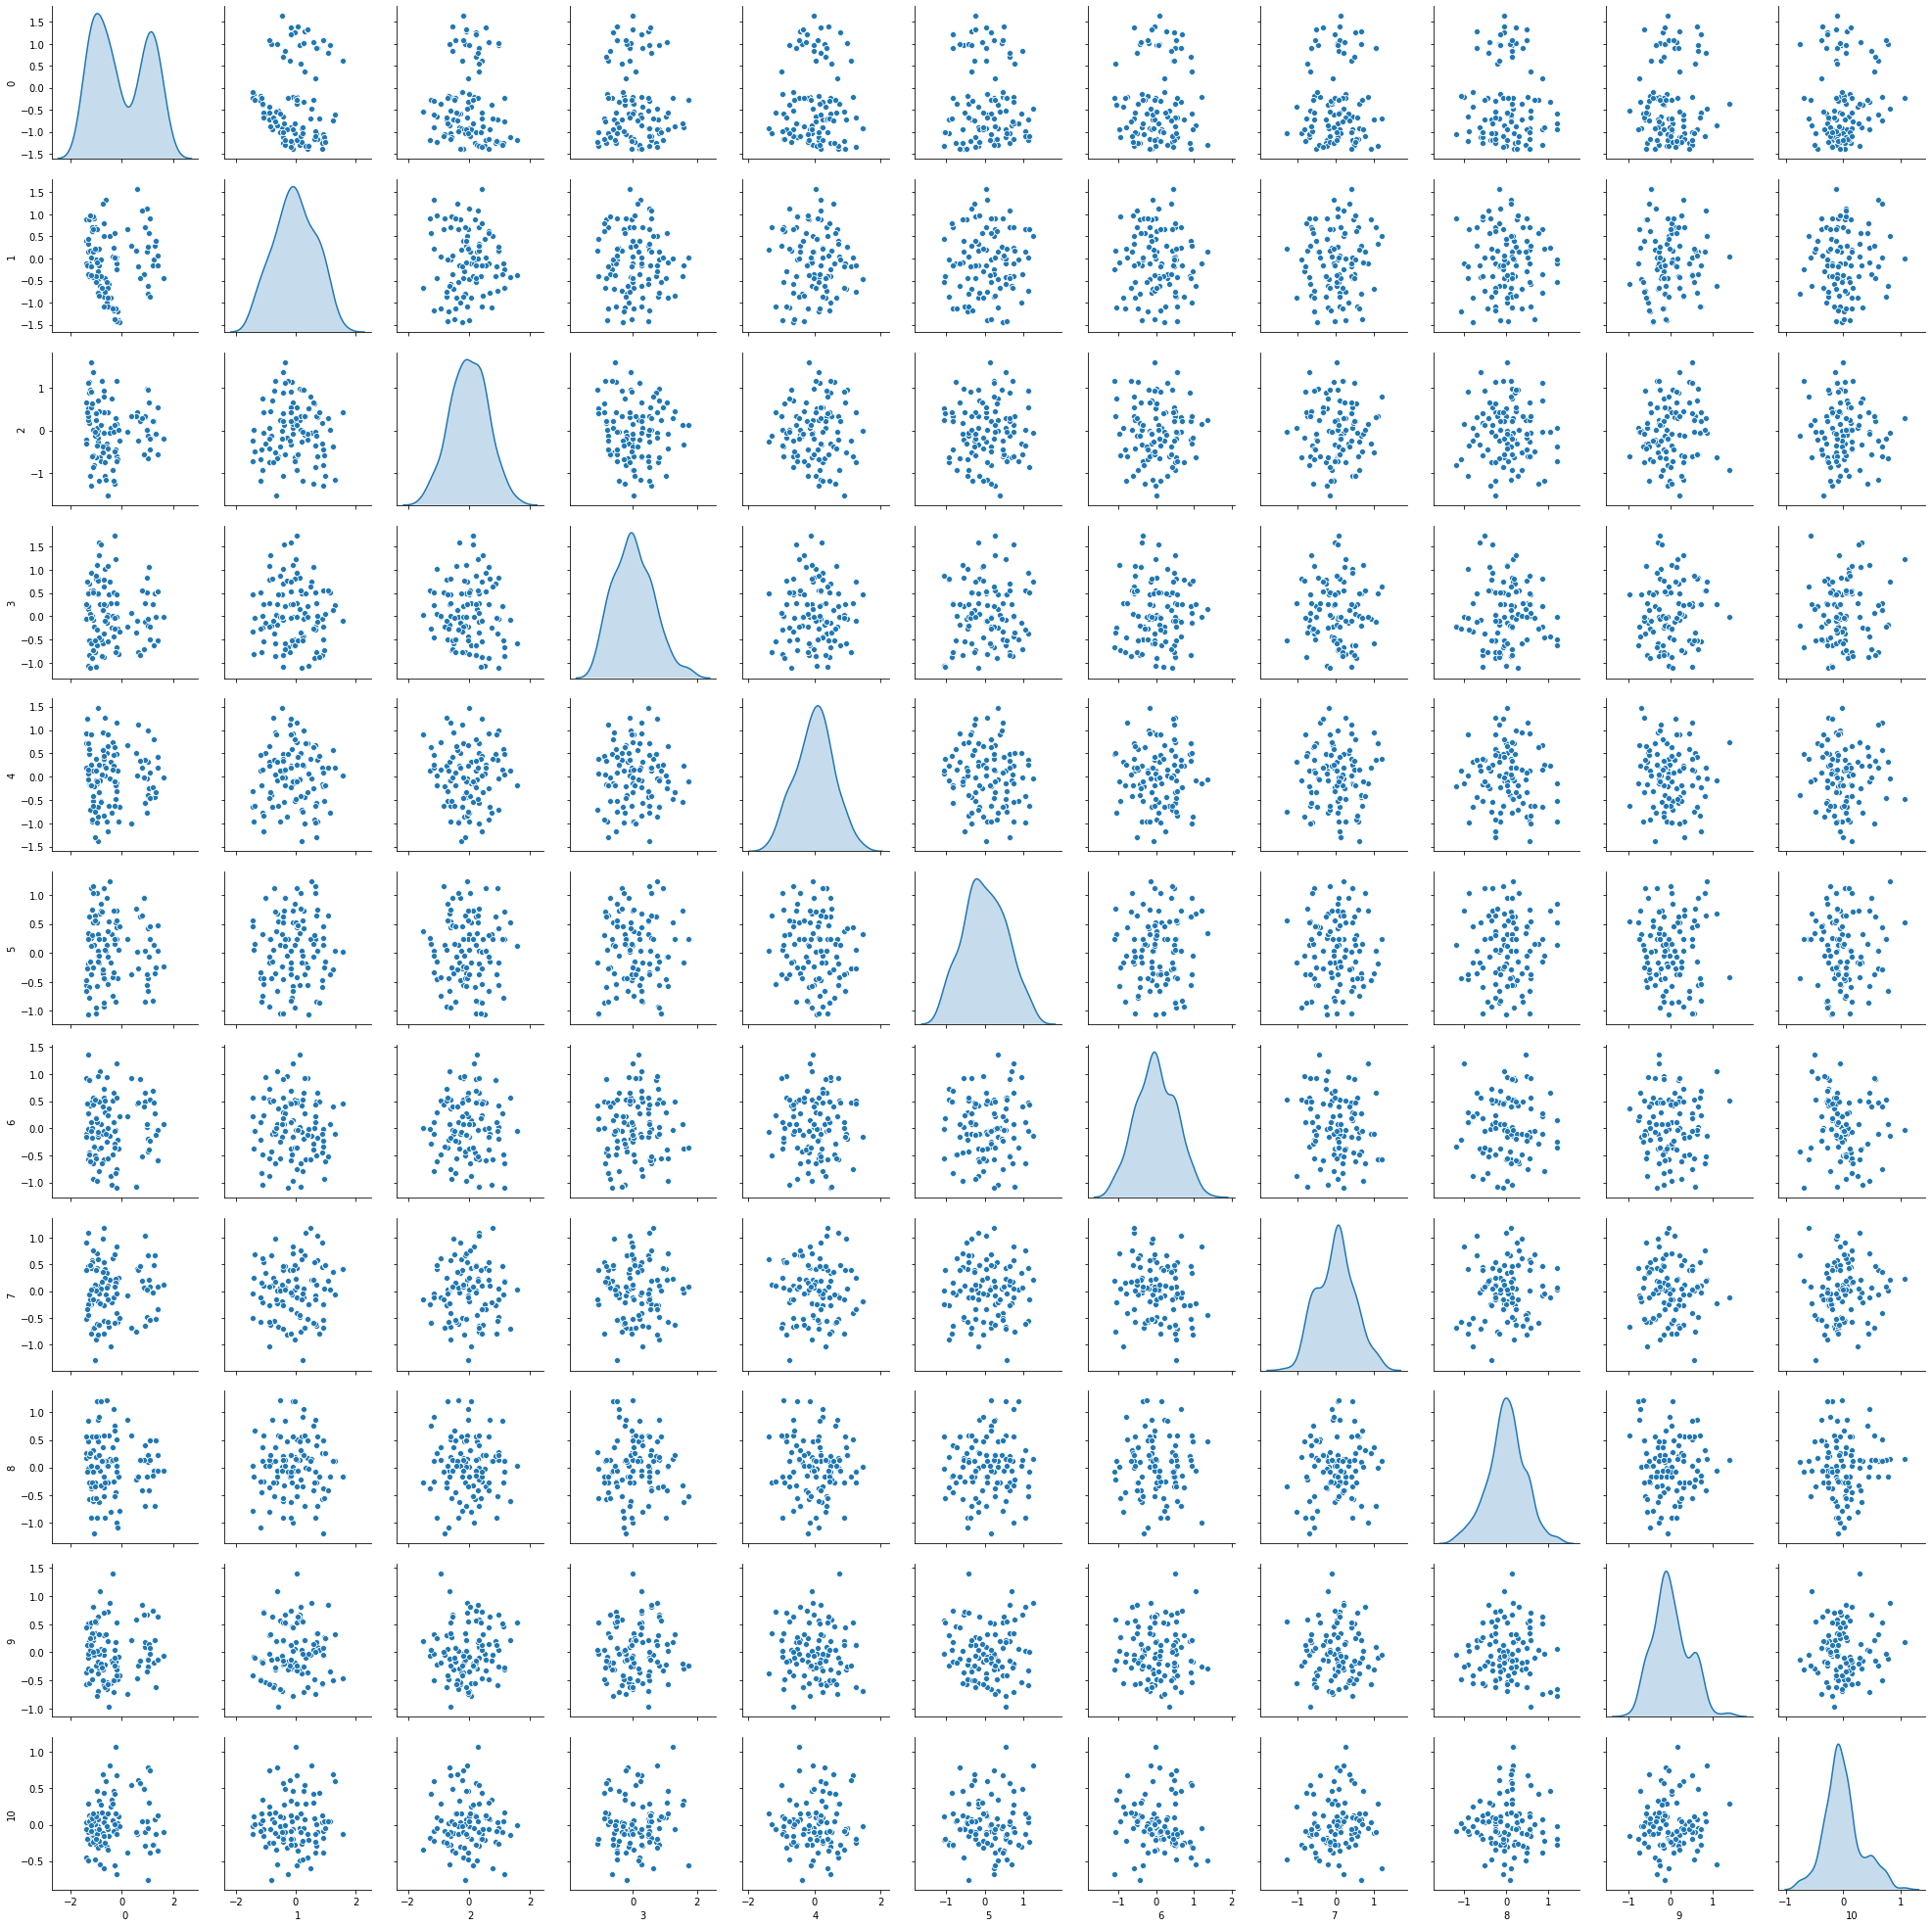

In [71]:
import seaborn as sns
sns.pairplot(df_pca_transform,diag_kind='kde')

In [72]:
from sklearn.cluster import KMeans
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(df_pca_transform)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,958.821458
1,2,724.535390
2,3,652.447478
3,4,596.722383
4,5,551.157666
5,6,510.974798
6,7,494.863143
7,8,454.730074
8,9,444.842342
9,10,427.275359


### Elbow plot 

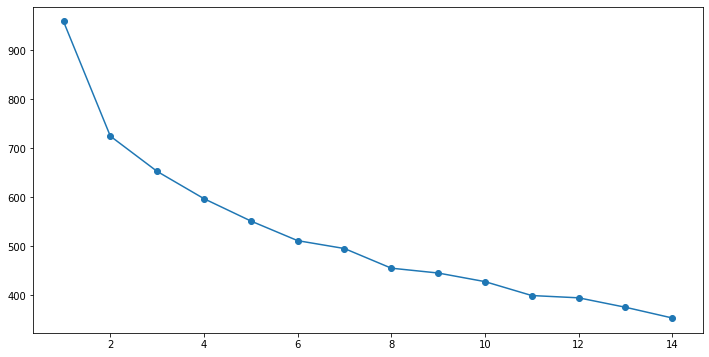

In [73]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.23434351820983454


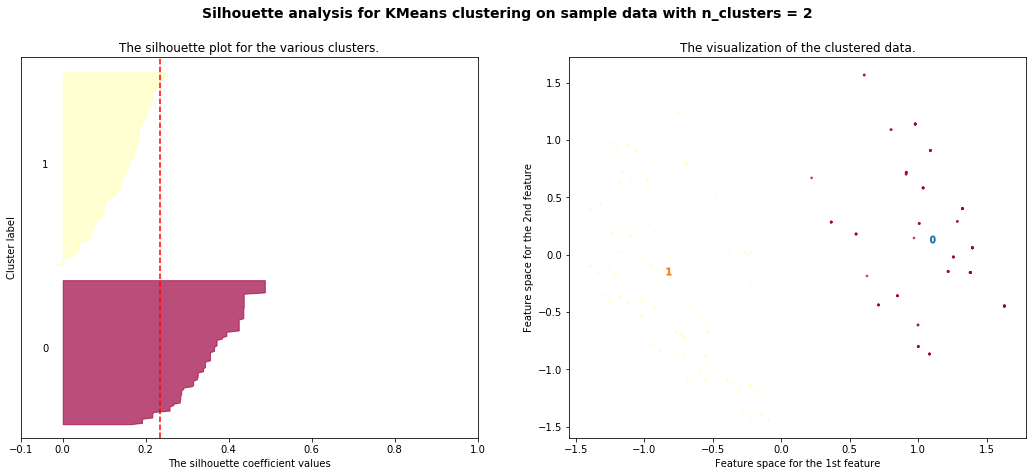

For n_clusters = 3 The average silhouette_score is : 0.23038259326063965


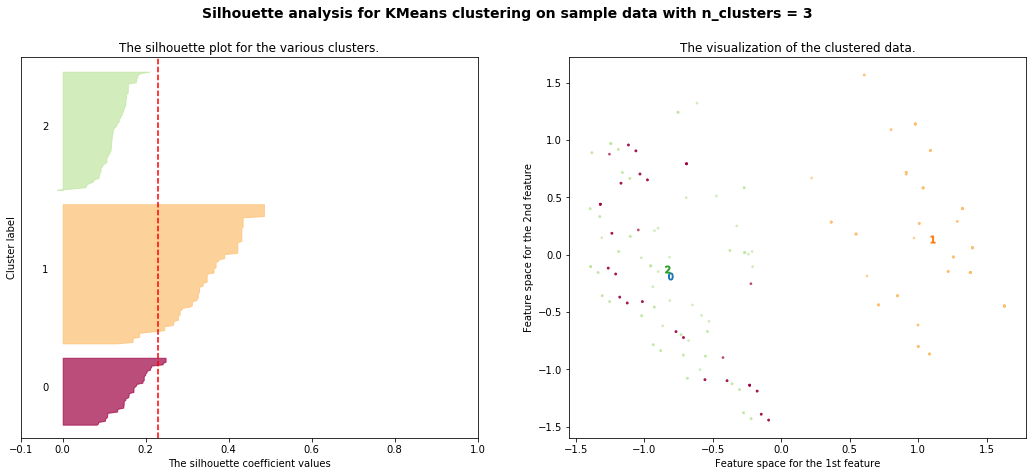

For n_clusters = 4 The average silhouette_score is : 0.22972768677884198


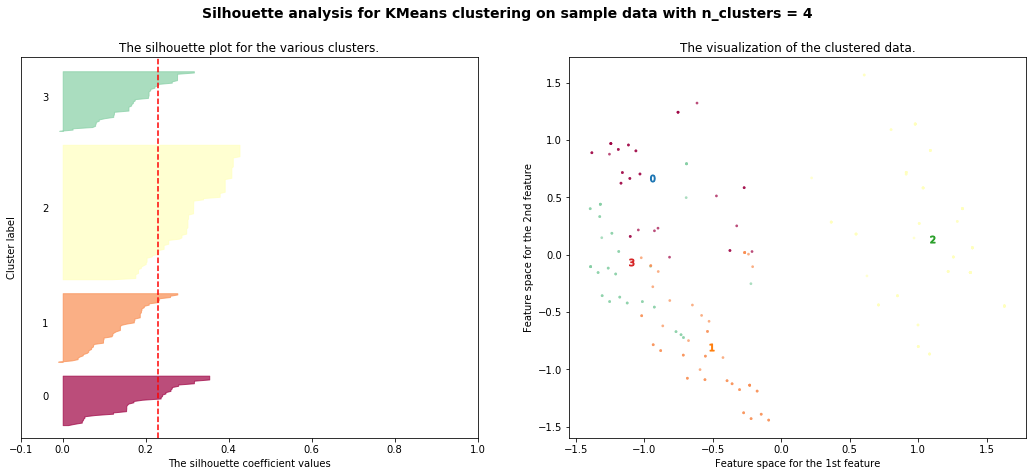

For n_clusters = 5 The average silhouette_score is : 0.22731728542451715


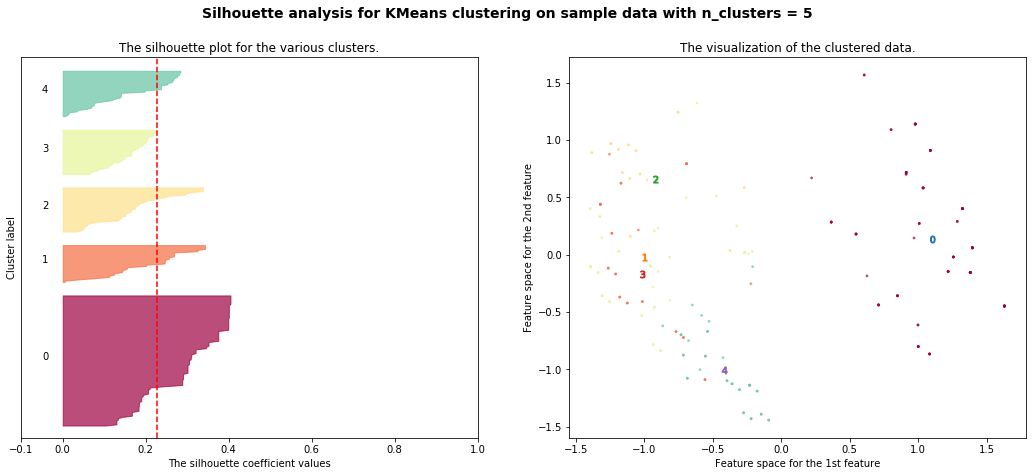

For n_clusters = 6 The average silhouette_score is : 0.18808299030903372


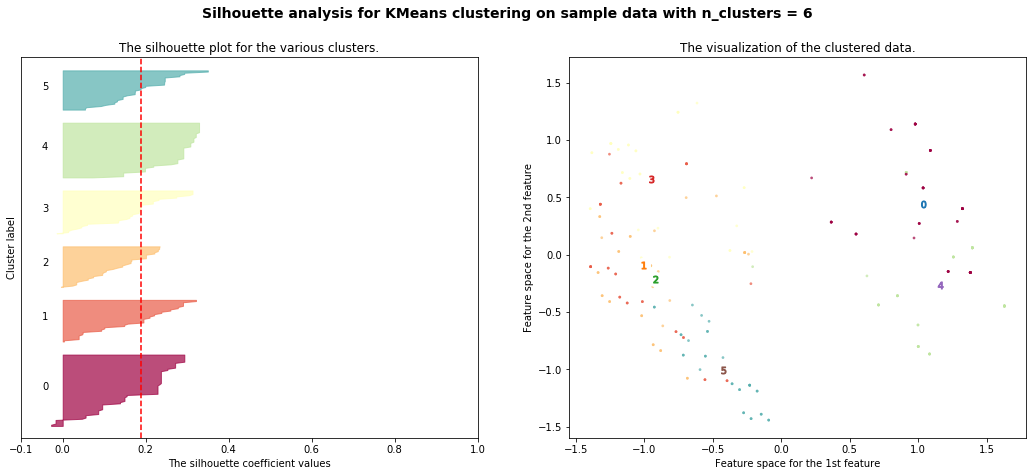

For n_clusters = 7 The average silhouette_score is : 0.19298511683013309


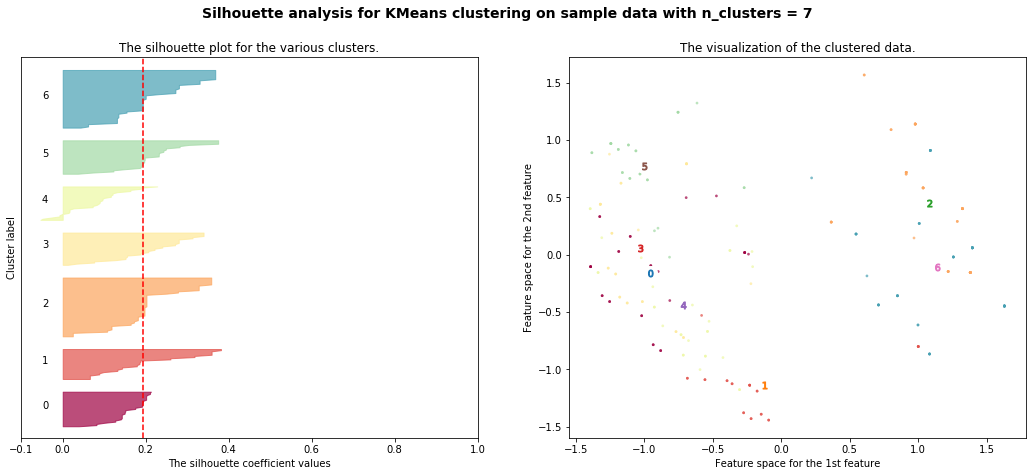

For n_clusters = 8 The average silhouette_score is : 0.19689122332561318


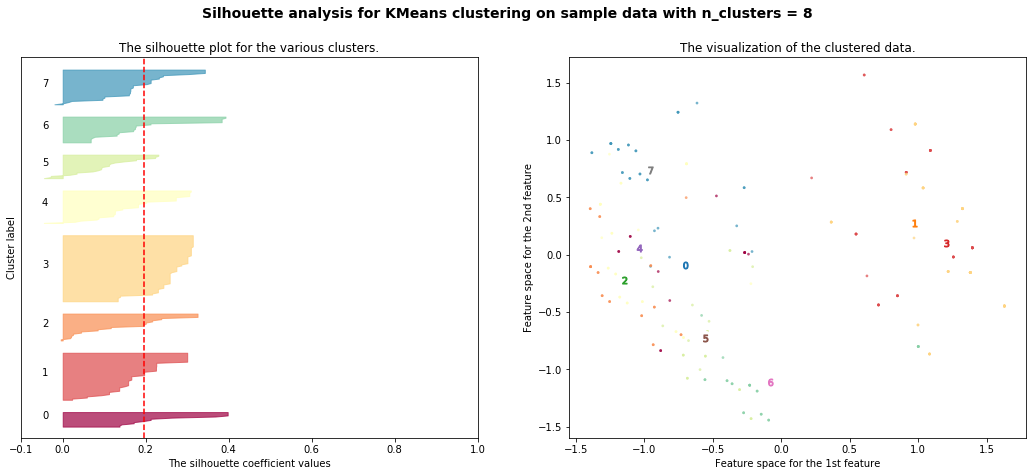

In [74]:
## from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=df_pca_transform.values

range_n_clusters = [2, 3, 4, 5, 6,7,8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [75]:
#Now form clusters out of the train data
# Number of clusters
kmeans = KMeans(n_clusters=2, random_state=5)

# Fitting the input data
kmeans = kmeans.fit(principalDf_train)

# Getting the cluster labels
labels = kmeans.predict(principalDf_train)

# Centroid values
centroids = kmeans.cluster_centers_

# Comparing with scikit-learn centroids
print("Centroid values")
print("sklearn")
print(centroids) # From sci-kit learn
print("labels", labels)

Centroid values
sklearn
[[-0.82562282 -0.10678856 -0.05751009  0.00731184 -0.00782456 -0.001507
  -0.02404309 -0.01234978 -0.01582496 -0.01473861  0.00330179]
 [ 1.09443026  0.14155693  0.07623431 -0.00969244  0.01037209  0.00199765
   0.03187107  0.01637064  0.02097728  0.01953722 -0.00437679]]
labels [0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0
 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0
 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1
 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0]


## 10. Create a new column in the train data and populate it with the cluster labels

In [76]:
#taking all cluster labels into clust_arr numpy ar
print("Before: ", principalDf_train.shape)
principalDf_train_new = np.column_stack((principalDf_train, labels))
print("After: ", principalDf_train_new.shape)

Before:  (200, 11)
After:  (200, 12)


## 11. Transform the test data using the same PCA object that was fit on the train data. 4 points

In [77]:
pca_X_test = pca.transform(X_test)
principalDf_test = pd.DataFrame(data = pca_X_test)

In [78]:
#use the same Kmeans object which was used for train data

kmeans = kmeans.fit(principalDf_test)

# Getting the cluster labels for the test data and storing it in labels_test
labels_test = kmeans.predict(principalDf_test)

# Centroid values
centroids = kmeans.cluster_centers_

# Comparing with scikit-learn centroids
print("Centroid values")
print("sklearn")
print(centroids) # From sci-kit learn
print("labels_test", labels_test)



#taking all cluster labels into clust_arr numpy arr
print("Before: ", principalDf_test.shape)
principalDf_test_new = np.column_stack((principalDf_test, labels_test))
print("After: ", principalDf_test_new.shape)

Centroid values
sklearn
[[-0.83434846 -0.29427628  0.02825431  0.24778154  0.12213247 -0.07358147
  -0.05533694  0.10100532 -0.01079672  0.09174027 -0.02407422]
 [ 1.13052571  0.12372837  0.00738886 -0.03693479 -0.03641647  0.11127404
   0.0840973  -0.09127566  0.10937579  0.14395118  0.04704236]]
labels_test [0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0
 1 1 1 0 0 0 1 1 0 1 0 1 0]
Before:  (50, 11)
After:  (50, 12)


In [79]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix


# Building a Support Vector Machine on train data
svc_model = SVC(C=.1, kernel='linear', gamma=1)
svc_model.fit(pca_X_train, y_train)
prediction = svc_model.predict(pca_X_test)
# check the accuracy on the training set
print(svc_model.score(pca_X_train, y_train))
print(svc_model.score(pca_X_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))


# Building a Support Vector Machine on train data
svc_model = SVC(kernel='rbf')
svc_model.fit(pca_X_train, y_train)
prediction = svc_model.predict(pca_X_test)
print(svc_model.score(pca_X_train, y_train))
print(svc_model.score(pca_X_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))



# Building a Support Vector Machine on train data
svc_model  = SVC(kernel='poly')
svc_model.fit(pca_X_train, y_train)
prediction = svc_model.predict(pca_X_test)
print(svc_model.score(pca_X_train, y_train))
print(svc_model.score(pca_X_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))


svc_model = SVC(kernel='sigmoid')
svc_model.fit(pca_X_train, y_train)
prediction = svc_model.predict(pca_X_test)
print("svc_model score train : ",svc_model.score(pca_X_train, y_train))
print("svc_model score test : ",svc_model.score(pca_X_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))


0.99
1.0
Confusion Matrix:
 [[21  0]
 [ 0 29]]
1.0
1.0
Confusion Matrix:
 [[21  0]
 [ 0 29]]
0.86
0.88
Confusion Matrix:
 [[15  0]
 [ 6 29]]
svc_model score train :  0.99
svc_model score test :  1.0
Confusion Matrix:
 [[21  0]
 [ 0 29]]


D:\anakonda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\anakonda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\anakonda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### 14. Apply SVC model on train dataset and predict target for test dataset

In [80]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix


# Building a Support Vector Machine on train data
svc_model = SVC(C=.1, kernel='linear', gamma=1)
svc_model.fit(X_train, y_train)
prediction = svc_model.predict(X_test)
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))



# Building a Support Vector Machine on train data
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)
prediction = svc_model.predict(X_test)
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))



# Building a Support Vector Machine on train data
svc_model  = SVC(kernel='poly')
svc_model.fit(X_train, y_train)
prediction = svc_model.predict(X_test)
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))


svc_model = SVC(kernel='sigmoid')
svc_model.fit(X_train, y_train)
prediction = svc_model.predict(X_test)
print("svc_model score train : ",svc_model.score(X_train, y_train))
print("svc_model score test : ",svc_model.score(X_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

1.0
1.0
Confusion Matrix:
 [[21  0]
 [ 0 29]]
1.0
1.0
Confusion Matrix:
 [[21  0]
 [ 0 29]]
0.92
0.88
Confusion Matrix:
 [[15  0]
 [ 6 29]]
svc_model score train :  0.98
svc_model score test :  1.0
Confusion Matrix:
 [[21  0]
 [ 0 29]]


D:\anakonda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\anakonda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\anakonda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
